In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [8]:
df=pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [13]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
X = df.drop('species', axis=1)
y = to_categorical(df['species'])  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.4753 - loss: 1.0664 - val_accuracy: 0.6250 - val_loss: 1.0048
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6159 - loss: 0.9659 - val_accuracy: 0.7083 - val_loss: 0.9372
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6849 - loss: 0.8746 - val_accuracy: 0.7500 - val_loss: 0.8738
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7018 - loss: 0.8174 - val_accuracy: 0.7500 - val_loss: 0.8168
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7305 - loss: 0.7663 - val_accuracy: 0.8333 - val_loss: 0.7632
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7969 - loss: 0.7070 - val_accuracy: 0.8333 - val_loss: 0.7123
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8555 - loss: 0.6278 - val_accuracy: 0.8333 - val_loss: 0.6642
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7656 - loss: 0.6419 - val_accuracy: 0.8333 - val_loss: 0.6217
Epoch 9/20

In [23]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9333 - loss: 0.2812
Test Accuracy: 93.33%


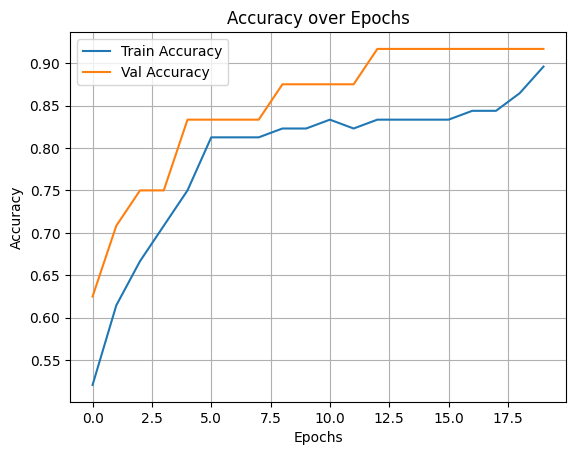

In [25]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()